<a href="https://colab.research.google.com/github/codeworks-data/mvp-retail/blob/test-train-V1/Retail_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git init
!git config --global 'hajar.aitelkadi.o@gmail.com'
!git config --global user.name “HAEKADI”

/content/drive/.git: Operation not supported
time: 364 ms (started: 2021-01-29 10:18:23 +00:00)


# Project Scoping

## Data Collection

In [ ]:
# In order to get the execution time of each cell
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.54 s (started: 2021-01-29 10:17:57 +00:00)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

time: 1.18 ms (started: 2021-01-29 10:17:59 +00:00)


#Import libraries

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, date

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#ML
from sklearn.cluster import KMeans


time: 2.2 ms (started: 2021-01-29 10:17:59 +00:00)


# Data Exploration

## Import Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.98 ms (started: 2021-01-29 10:19:23 +00:00)


## Customers dataset

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/datasets/archive/Customer.csv', decimal= '.', low_memory = False) #index_col='customer_Id'

time: 19 ms (started: 2021-01-29 10:18:03 +00:00)


In [ ]:
customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


time: 19.7 ms (started: 2021-01-29 09:03:30 +00:00)


In [ ]:
customers.shape

(5647, 4)

time: 2.9 ms (started: 2021-01-29 09:03:30 +00:00)


In [ ]:
customers.dtypes

customer_Id      int64
DOB             object
Gender          object
city_code      float64
dtype: object

time: 5.19 ms (started: 2021-01-29 09:03:30 +00:00)


In [ ]:
customers['customer_Id'] = customers['customer_Id'].astype(str)
customers['city_code'] = customers['city_code'].astype(str)

time: 19.6 ms (started: 2021-01-29 09:03:30 +00:00)


In [ ]:
customers['customer_Id'].nunique()

5647

time: 9.59 ms (started: 2021-01-29 09:03:30 +00:00)


In [ ]:
customers.describe(include = 'object')

,customer_Id,DOB,Gender,city_code
count,5647,5647,5645,5647
unique,5647,4056,2,11
top,269366,27-12-1988,M,3.0
freq,1,7,2892,595


time: 64 ms (started: 2021-01-29 09:03:30 +00:00)


### Customer Gender

In [ ]:
fig_gender = px.histogram(customers, x='Gender', title="Customers By Gender", color_discrete_sequence=['olivedrab'] )
fig_gender.show()

time: 321 ms (started: 2021-01-29 09:03:30 +00:00)


###  Customer Age

In [ ]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

time: 2.15 ms (started: 2021-01-29 09:03:30 +00:00)


In [ ]:
customers['age'] = pd.to_datetime(customers['DOB'], format='%d-%m-%Y').apply(lambda x: calculate_age(x))

time: 57.9 ms (started: 2021-01-29 09:03:30 +00:00)


In [ ]:
customers.head(3)

,customer_Id,DOB,Gender,city_code,age
0,268408,02-01-1970,M,4.0,51
1,269696,07-01-1970,F,8.0,51
2,268159,08-01-1970,F,8.0,51


time: 14.3 ms (started: 2021-01-29 09:03:31 +00:00)


In [ ]:
fig_DOB = px.histogram(customers, x="age", marginal="box", nbins = 100, # can be `box`, `violin`,
                         color_discrete_sequence=['mediumaquamarine'] )
fig_DOB.show()

time: 340 ms (started: 2021-01-29 09:03:31 +00:00)


In [ ]:
#drop the DOB column
#customers.drop('DOB', 1, inplace = True)

time: 1.38 ms (started: 2021-01-29 09:03:31 +00:00)


### Customer City Code

In [ ]:
fig_code = px.histogram(customers, x='city_code', title="Customers By City Code", nbins = 50, )
fig_code.show()

time: 511 ms (started: 2021-01-29 09:03:31 +00:00)


## Products Dataset

In [ ]:
products = pd.read_csv('/content/drive/MyDrive/datasets/archive/prod_cat_info.csv', decimal= '.', low_memory = False, )

time: 16.3 ms (started: 2021-01-29 09:03:31 +00:00)


In [ ]:
products.head(3)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


time: 14.5 ms (started: 2021-01-29 09:03:31 +00:00)


In [ ]:
products.shape

(23, 4)

time: 3.2 ms (started: 2021-01-29 09:03:31 +00:00)


In [ ]:
products.rename(columns={"prod_sub_cat_code": "prod_subcat_code"}, inplace= True)

time: 6.43 ms (started: 2021-01-29 09:03:31 +00:00)


## Transactions Dataset

In [ ]:
transactions = pd.read_csv('/content/drive/MyDrive/datasets/archive/Transactions.csv', decimal= '.', low_memory = False) #index_col = "transaction_id"

time: 44.1 ms (started: 2021-01-29 09:03:32 +00:00)


In [ ]:
transactions.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


time: 25.3 ms (started: 2021-01-29 09:03:32 +00:00)


In [ ]:
transactions.shape

(23053, 10)

time: 2.98 ms (started: 2021-01-29 09:03:32 +00:00)


In [ ]:
transactions.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

time: 6.62 ms (started: 2021-01-29 09:03:32 +00:00)


In [ ]:
transactions['transaction_id'] = transactions['transaction_id'].astype(str)
transactions.rename(columns={"cust_id": "customer_Id"}, inplace= True)
transactions['customer_Id'] = transactions['customer_Id'].astype(str)

time: 54 ms (started: 2021-01-29 09:03:32 +00:00)


In [ ]:
transactions['tran_date'] = pd.to_datetime(transactions['tran_date'])

time: 44.3 ms (started: 2021-01-29 09:03:32 +00:00)


In [ ]:
transactions.dtypes

transaction_id              object
customer_Id                 object
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
dtype: object

time: 5.56 ms (started: 2021-01-29 09:03:32 +00:00)


In [ ]:
#extract column with transaction year
transactions['tran_year'] = transactions['tran_date'].apply(lambda x: x.year ).astype(str)#+ x.month

time: 122 ms (started: 2021-01-29 09:03:32 +00:00)


### Merge with products dataset

In [ ]:
transactions = pd.merge(transactions, products, on=['prod_cat_code','prod_subcat_code'])

time: 18.2 ms (started: 2021-01-29 09:03:32 +00:00)


In [ ]:
transactions.head(3)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,tran_year,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.30,-4265.30,e-Shop,2014,Clothing,Women
1,80712190438,270351,2014-02-20,1,1,5,772,405.30,4265.30,e-Shop,2014,Clothing,Women
2,73713102191,268867,2014-02-15,1,1,1,714,74.97,788.97,MBR,2014,Clothing,Women


time: 29.5 ms (started: 2021-01-29 09:03:32 +00:00)


### Revenue distribution by date

In [ ]:
fig = px.histogram(transactions, x="tran_date", y="total_amt", histfunc="sum",  title="Histogram on Date Axes" , color_discrete_sequence=['skyblue'])
fig.update_traces(xbins_size="M1")#M1, M2 M0 is for days, M1 for months
fig.update_xaxes(showgrid=True, dtick="M1")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

time: 872 ms (started: 2021-01-29 09:12:47 +00:00)


### Revenue by customer per year

In [ ]:
customers_trans = transactions.groupby(['customer_Id','tran_year'])['total_amt'].sum().reset_index().sort_values(by = ['customer_Id','total_amt'],ascending = False)

time: 57.3 ms (started: 2021-01-29 09:03:33 +00:00)


In [ ]:
customers_trans.head(5)

,customer_Id,tran_year,total_amt
12582,275265,2013,2383.485
12581,275265,2011,868.530
12580,275264,2011,3815.565
12579,275262,2012,3328.260
12578,275262,2011,1750.320


time: 33.1 ms (started: 2021-01-29 09:03:33 +00:00)


In [ ]:
customers_trans.dtypes

customer_Id     object
tran_year       object
total_amt      float64
dtype: object

time: 8.82 ms (started: 2021-01-29 09:03:33 +00:00)


In [ ]:
# Clients which generated the most revenue per year
customers_trans.iloc[customers_trans['total_amt'].argsort()[-5:]]

,customer_Id,tran_year,total_amt
7509,271834,2011,23505.560
7873,272080,2012,23743.135
8917,272799,2011,24493.430
8250,272354,2013,25256.985
1237,267634,2013,29341.065


time: 23.9 ms (started: 2021-01-29 09:03:33 +00:00)


In [ ]:
fig = px.scatter(customers_trans.head(100), x="customer_Id", y="total_amt", color='tran_year', title="Histogram on Date Axes", size = 'total_amt')
fig.update_xaxes(tickangle=90, type ='category')
#fig.update_xaxes(tickangle=90, tickfont=dict(family='Rockwell', color='crimson', size=10), type ='category')
fig.show()

time: 388 ms (started: 2021-01-29 09:03:33 +00:00)


### Revenue by category per year

In [ ]:
category_trans = transactions.groupby(['prod_cat','tran_year'])['total_amt'].sum().reset_index().sort_values(by = ['tran_year','total_amt'],ascending = True)
category_trans.shape

(24, 3)

time: 21.1 ms (started: 2021-01-29 09:03:34 +00:00)


In [ ]:
category_trans.head(3)

,prod_cat,tran_year,total_amt
0,Bags,2011,1278465.110
8,Clothing,2011,1775218.965
16,Footwear,2011,1842294.675


time: 15.2 ms (started: 2021-01-29 09:03:34 +00:00)


In [ ]:
fig = px.scatter(category_trans.head(1000), x="prod_cat", y="total_amt", color='tran_year', title="Histogram on Date Axes", size = 'total_amt')
fig.update_xaxes(tickangle=90, type ='category')
#fig.update_xaxes(tickangle=90, tickfont=dict(family='Rockwell', color='crimson', size=10), type ='category')
fig.show()

time: 324 ms (started: 2021-01-29 09:03:34 +00:00)


### Store Type

In [ ]:
fig_store= px.histogram(transactions, x='Store_type', title="Transactions by store type", color_discrete_sequence=['indianred'])
fig_store.show()

time: 584 ms (started: 2021-01-29 09:03:34 +00:00)


### Returns

We consider negative total_amt as returns.

In [ ]:
returns = transactions.loc[transactions['total_amt']<0]
returns.shape

(2177, 13)

time: 14 ms (started: 2021-01-29 09:03:35 +00:00)


In [ ]:
returns.dtypes

transaction_id              object
customer_Id                 object
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
tran_year                   object
prod_cat                    object
prod_subcat                 object
dtype: object

time: 5.07 ms (started: 2021-01-29 09:03:35 +00:00)


In [ ]:
returns['tran_year'].value_counts()

2012    723
2013    678
2011    666
2014    110
Name: tran_year, dtype: int64

time: 7.12 ms (started: 2021-01-29 09:03:35 +00:00)


In [ ]:
fig= px.histogram(returns, x='tran_year', color = 'prod_cat_code', title="Transactions by store type") #color = 'Store_type'
fig.update_xaxes(type ='category')
fig.show()

time: 414 ms (started: 2021-01-29 09:03:35 +00:00)


In [ ]:
returns_by_customer = returns.groupby(['customer_Id'])['total_amt'].sum().reset_index().sort_values(by = ['customer_Id','total_amt'],ascending = False)
returns.head(3)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,tran_year,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,2014,Clothing,Women
5,65582112405,267243,2014-08-02,1,1,-3,-1259,396.585,-4173.585,e-Shop,2014,Clothing,Women
8,92456150942,267489,2014-05-02,1,1,-4,-587,246.540,-2594.540,TeleShop,2014,Clothing,Women


time: 47.2 ms (started: 2021-01-29 09:03:35 +00:00)


In [ ]:
#Customers with the most returns
returns_by_customer.iloc[returns_by_customer['total_amt'].argsort()[:5]]

,customer_Id,total_amt
1478,274035,-19429.215
728,270308,-18020.340
1068,271862,-16241.290
1242,272871,-16221.400
974,271391,-15934.100


time: 14.6 ms (started: 2021-01-29 09:03:35 +00:00)


In [ ]:
fig = px.histogram(returns, x="tran_date", y=returns['total_amt']*-1, histfunc="sum", title="Histogram on Date Axes" , color_discrete_sequence=['navy'])
fig.update_traces(xbins_size="M1")#M1, M2 M0 is for days, M1 for months
fig.update_xaxes(showgrid=True, dtick="M1")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

time: 518 ms (started: 2021-01-29 09:03:35 +00:00)


# Customer Segmenation


## Create RFM features (market research)

In [ ]:
#Function to create recency, frequency and monetary value
def RFM_columns(transactions, customer_Id, tran_date, total_amt):

  # Select only unique customer IDs
  customer_RFM = transactions.groupby(customer_Id)
  customer_RFM  = pd.DataFrame(transactions[customer_Id].unique(), columns = [customer_Id])
  customer_RFM[customer_Id].astype(str)

  # Create Dataframe of unique visitors and most recent visit to site
  df_recency = transactions.groupby(customer_Id)[tran_date].max().reset_index()
  df_recency.columns = [customer_Id, tran_date]
  df_recency[tran_date] = pd.to_datetime(df_recency[tran_date])
  df_recency['recency'] = (df_recency[tran_date].max() - df_recency[tran_date]).dt.days
  df_recency = df_recency.drop(tran_date, axis=1)
  df_recency['recency'].astype('int')
    
    # Get visit counts for each user and create dataframe
    # Frequency is determined by repeat purchases: (Order count - 1 ?) or not ?
  df_frequency = transactions.groupby(customer_Id)[tran_date].count().reset_index()
  df_frequency.columns = [customer_Id,'frequency']
  df_frequency['frequency'] = df_frequency['frequency'] 

    # Get total order revenue for each unique visitor 
  df_monetary_value = transactions.groupby(customer_Id)[total_amt].mean().reset_index()
    
    # Merge data
    
  dfs = [df_frequency, df_recency, df_monetary_value]
    
  for e in dfs:

    customer_RFM  = pd.merge(customer_RFM , e, on=customer_Id)
  
  customer_RFM['customer_Id'] = customer_RFM['customer_Id'].astype('str')
        
  return customer_RFM 

time: 27.3 ms (started: 2021-01-29 09:03:36 +00:00)


In [ ]:
#create df with RFM indices
customer_RFM = RFM_columns(transactions, 'customer_Id', 'tran_date', 'total_amt' )
customer_RFM.rename(columns={"total_amt": "monetary_value"}, inplace= True)

time: 84.6 ms (started: 2021-01-29 09:03:36 +00:00)


In [ ]:
customer_RFM.describe()

,frequency,recency,monetary_value
count,5506.000000,5506.000000,5506.000000
mean,4.186887,542.813113,2210.797412
std,2.116528,261.615379,1250.839925
min,1.000000,0.000000,-1958.336250
25%,3.000000,366.250000,1319.439062
50%,4.000000,479.000000,2074.195500
75%,6.000000,679.000000,2936.997917
max,13.000000,1428.000000,8204.625000


time: 30.7 ms (started: 2021-01-29 09:03:36 +00:00)


### Recency

How recently did the customer purchase?

In [ ]:
fig_recency = px.histogram(customer_RFM, x='recency', title="Customer Recency", nbins = 50, marginal="box" , color_discrete_sequence=['tomato'])
fig_recency.show()

time: 322 ms (started: 2021-01-29 09:03:36 +00:00)


### Frequency

How often do they purchase?

In [ ]:
fig_frequency = px.histogram(customer_RFM, x='frequency', title="Customer Frequency", nbins = 10, marginal="box" , color_discrete_sequence=['yellowgreen'])
fig_frequency.update_xaxes(type ='category')
fig_frequency.show()

time: 339 ms (started: 2021-01-29 09:03:36 +00:00)


### Monetary value

In [ ]:
fig_monetary = px.histogram(customer_RFM, x='monetary_value', title="Customer Monetary Value", nbins = 100, marginal="box" , color_discrete_sequence=['teal'])
fig_monetary.show()

time: 536 ms (started: 2021-01-29 09:03:36 +00:00)


## Clustering by feature

#### Elbow plots

frequency


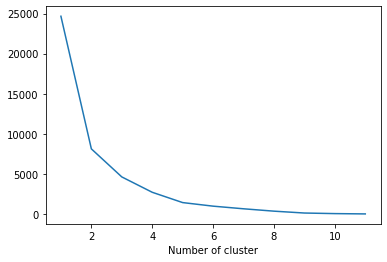

recency


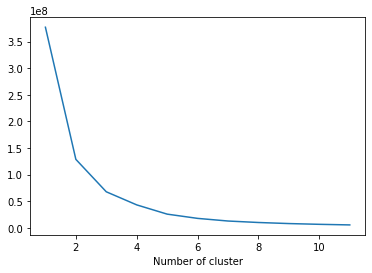

monetary_value


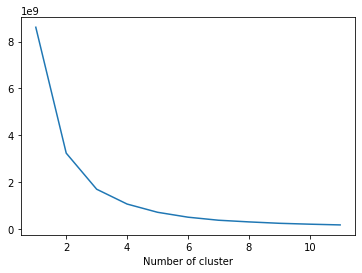

time: 6.19 s (started: 2021-01-29 09:03:37 +00:00)


In [ ]:
def SSE_plot(df, col_to_plot=False):
    '''
    This function takes in one column of
    the RFM dataframe as a string
    and will plot a KMeans elbow plot of the 
    sum of squared estimate. Where the elbow
    bends will determine how many clusters are
    optimal for the Kmeans clustering.
    '''
    sse={}
    if col_to_plot:
        km_var = df[[col_to_plot]].copy()
    else:
        km_var = df.copy()
    for k in range(1, 12):
        kmeans = KMeans(n_clusters=k, max_iter=10000).fit(km_var)
        km_var["clusters"] = kmeans.labels_
        sse[k] = kmeans.inertia_ 
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
#     plt.title(str(km_var))
    plt.show();

for col in ['frequency', 'recency', 'monetary_value']:
    print(col)
    SSE_plot(customer_RFM, col)

It seem that 4 is the optimal number of clusters for the 3 features.

Recency

In [ ]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(customer_RFM[['recency']])
customer_RFM['recency_cluster'] = kmeans.predict(customer_RFM[['recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

customer_RFM= order_cluster('recency_cluster', 'recency', customer_RFM, False) # False because better clients for cluster 3

time: 118 ms (started: 2021-01-29 09:03:43 +00:00)


In [ ]:
customer_RFM.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,600.0,1090.781667,140.149505,888.0,970.5,1071.0,1190.0,1428.0
1,1603.0,686.280724,94.394786,545.0,605.0,674.0,760.0,887.0
2,2961.0,403.773050,71.412287,275.0,347.0,400.0,459.0,544.0
3,342.0,112.807018,76.683974,0.0,38.5,122.0,183.0,245.0


time: 37.4 ms (started: 2021-01-29 09:03:43 +00:00)


#### Frequency

In [ ]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(customer_RFM[['frequency']])
customer_RFM['frequency_cluster'] = kmeans.predict(customer_RFM[['frequency']])

#order the frequency cluster
customer_RFM = order_cluster('frequency_cluster', 'frequency',customer_RFM,True)

#see details of each cluster
customer_RFM.groupby('frequency_cluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,1281.0,1.638564,0.480604,1.0,1.0,2.0,2.0,2.0
1,2045.0,3.501222,0.500121,3.0,3.0,4.0,4.0,4.0
2,1411.0,5.442240,0.496829,5.0,5.0,5.0,6.0,6.0
3,769.0,7.951886,1.197447,7.0,7.0,8.0,9.0,13.0


time: 87 ms (started: 2021-01-29 09:03:43 +00:00)


#### Monetary Value

In [ ]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(customer_RFM[['monetary_value']])
customer_RFM['monetary_value_cluster'] = kmeans.predict(customer_RFM[['monetary_value']])


#order the cluster numbers
customer_RFM = order_cluster('monetary_value_cluster', 'monetary_value', customer_RFM,True)

customer_RFM.groupby('monetary_value_cluster')['monetary_value'].describe()

,count,mean,std,min,25%,50%,75%,max
monetary_value_cluster,,,,,,,,
0,1700.0,899.089518,444.359054,-1958.33625,619.007187,987.685833,1261.702813,1496.998750
1,2118.0,2084.949119,340.557876,1497.27500,1792.356042,2078.311625,2380.170000,2692.885000
2,1303.0,3292.027780,406.262416,2694.26625,2950.994583,3232.309167,3610.587500,4161.061667
3,385.0,5035.750487,827.549674,4169.16500,4410.423333,4762.550000,5464.501250,8204.625000


time: 155 ms (started: 2021-01-29 09:03:43 +00:00)


In [ ]:
customer_RFM

,customer_Id,frequency,recency,monetary_value,recency_cluster,frequency_cluster,monetary_value_cluster
0,270351,5,277,1153.841000,2,2,0
1,268867,6,290,79.928333,2,2,0
2,268810,6,307,1216.789167,2,2,0
3,269862,5,321,914.277000,2,2,0
4,273436,6,335,1288.798333,2,2,0
...,...,...,...,...,...,...,...
5501,272673,3,1013,4193.106667,0,1,3
5502,273461,3,999,5773.256667,0,1,3
5503,274522,3,1101,4223.310000,0,1,3
5504,269068,3,891,4622.583333,0,1,3


time: 29.7 ms (started: 2021-01-29 09:04:15 +00:00)


### Overall Score

In [ ]:
#calculate overall score and use mean() to see details
customer_RFM['overall_score'] = customer_RFM['recency_cluster'] + customer_RFM['frequency_cluster'] + customer_RFM['monetary_value_cluster']
customer_RFM.groupby('overall_score')['recency','frequency','monetary_value_cluster'].mean()

,recency,frequency,monetary_value_cluster
overall_score,,,
0,1133.897959,1.374150,0.000000
1,928.617450,1.979866,0.345638
2,722.431177,2.532338,0.530680
3,619.263259,3.232401,0.854388
4,501.103394,4.026835,1.097869
5,425.412151,5.142857,1.339080
6,356.237772,6.237772,1.578804
7,277.097297,7.086486,1.913514
8,67.466667,7.600000,2.133333


time: 23.7 ms (started: 2021-01-29 09:06:12 +00:00)
